In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_csv('station_data_dataverse.csv')

# Display first few rows
print(df.head())

# Show DataFrame structure
print(df.info())

# Show basic statistics
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

# Check data types of each column
print(df.dtypes)


In [5]:
df["Events"] = np.arange(len(df))

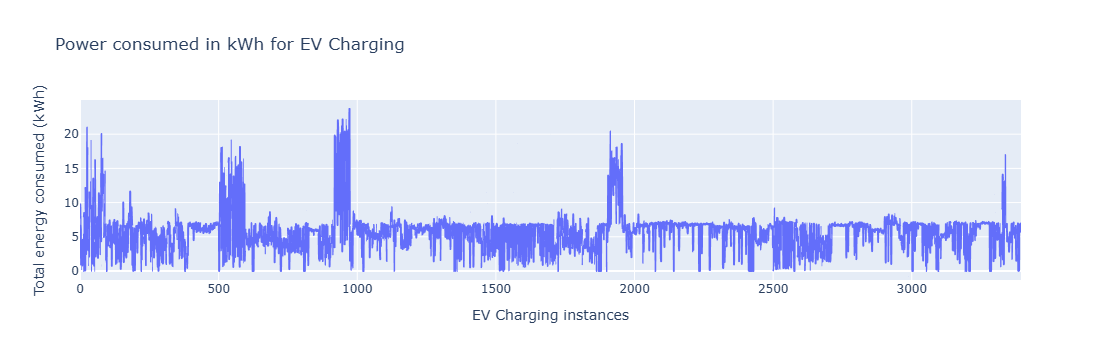

In [9]:
fig = px.line(df, 
              x="Events", 
              y="kwhTotal",
              labels = {"Events" : "EV Charging instances", "kwhTotal" : "Total energy consumed (kWh)"},
              title='Power consumed in kWh for EV Charging')
fig.show()

In [10]:
print("Average power consumed: {} kwh".format(df["kwhTotal"].mean()))

Average power consumed: 5.809628865979382 kwh


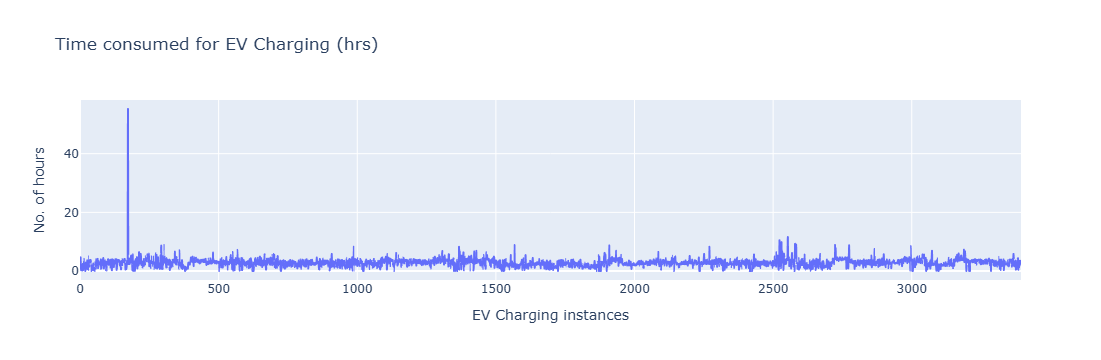

In [11]:
fig = px.line(df, 
              x="Events", 
              y="chargeTimeHrs", 
              labels = {"Events" : "EV Charging instances", "chargeTimeHrs" : "No. of hours"},
              title='Time consumed for EV Charging (hrs)')
fig.show()

In [12]:
print("Average charging time: {} hrs".format(df["chargeTimeHrs"].mean()))

Average charging time: 2.8414876452270987 hrs


C:\Users\Hp\AppData\Local\Temp\ipykernel_6404\3625613631.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




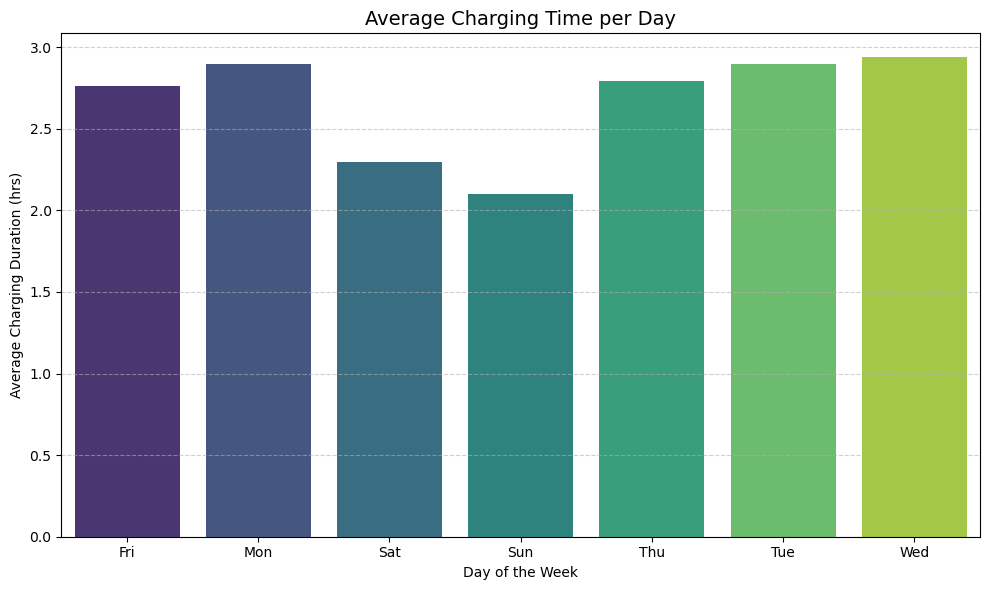

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Ensure correct weekday order
#weekday_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# Group by weekday and calculate average charging time
avg_duration = df.groupby('weekday')['chargeTimeHrs'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='viridis')

plt.title('Average Charging Time per Day', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Charging Duration (hrs)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


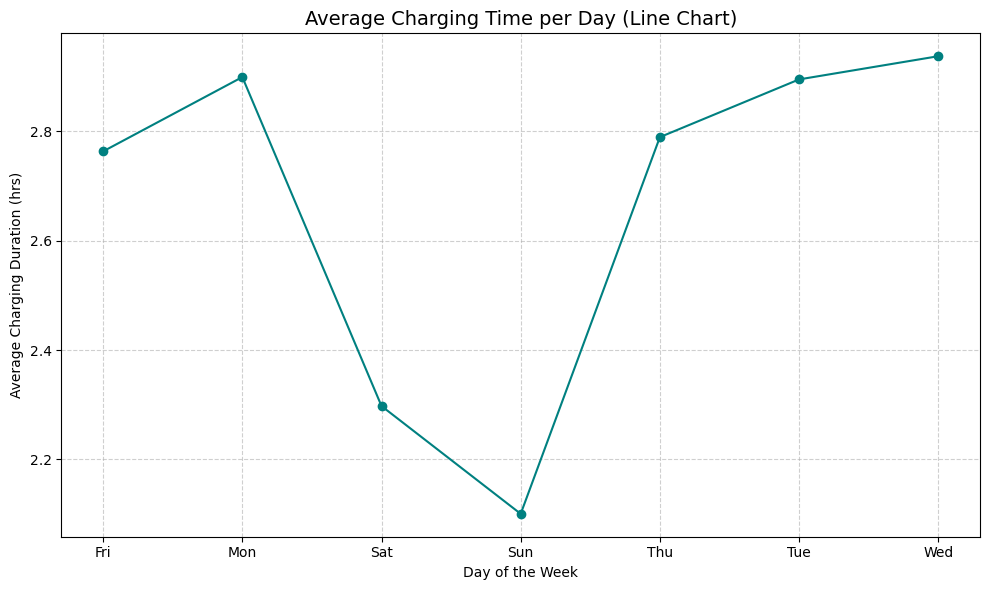

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure correct weekday order
weekday_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# Group by weekday and calculate average charging time
avg_duration = df.groupby('weekday')['chargeTimeHrs'].mean()

# Plot as a line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_duration.index, avg_duration.values, marker='o', linestyle='-', color='teal')

plt.title('Average Charging Time per Day (Line Chart)', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Charging Duration (hrs)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_6404\3547246560.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




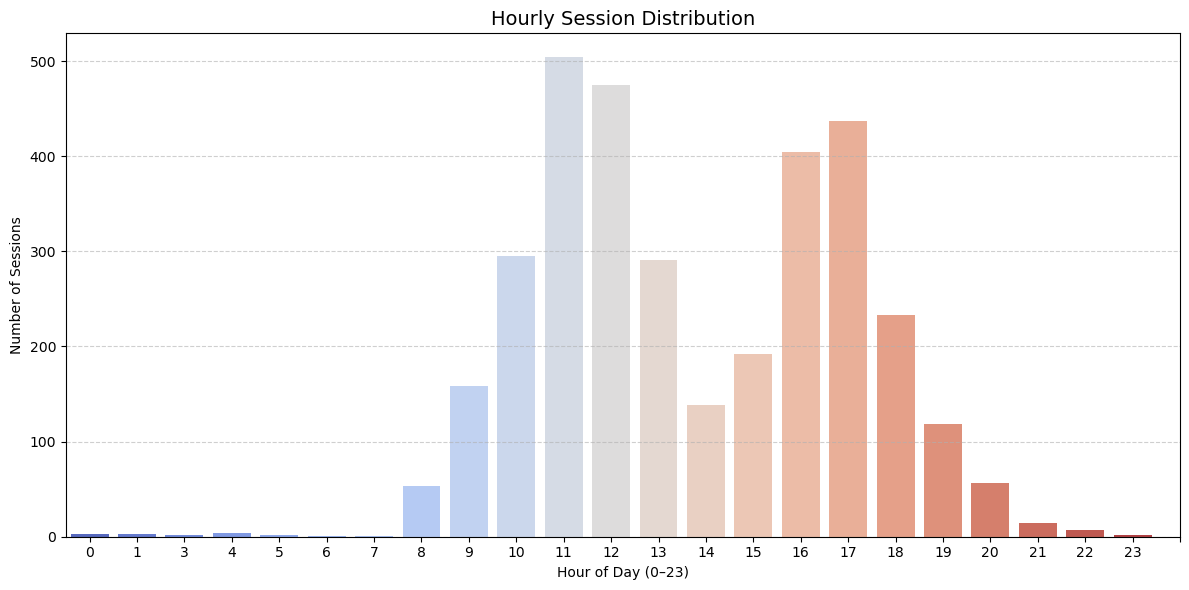

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of sessions per hour
session_counts = df['startTime'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=session_counts.index, y=session_counts.values, palette='coolwarm')

plt.title("Hourly Session Distribution", fontsize=14)
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Sessions")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_6404\4010303653.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




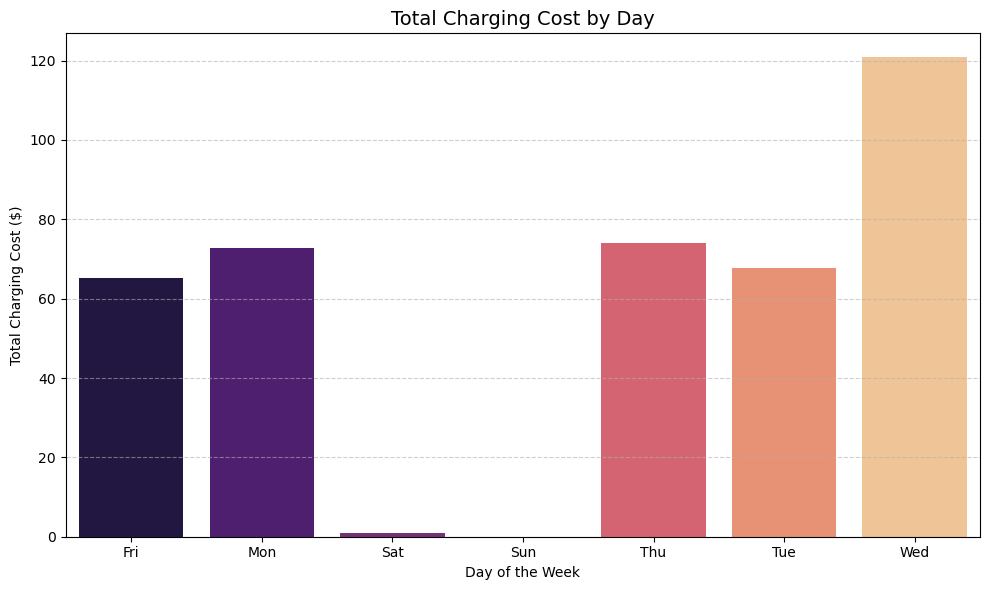

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure weekdays are in order
#weekday_order = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# Group and sum total dollars per day
daily_cost = df.groupby('weekday')['dollars'].sum()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_cost.index, y=daily_cost.values, palette='magma')

plt.title("Total Charging Cost by Day", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Total Charging Cost ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


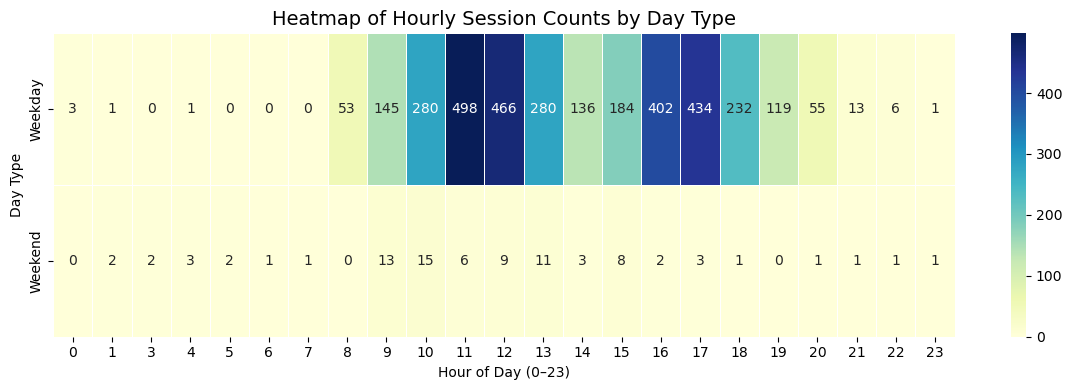

In [24]:
df['DayType'] = df['weekday'].apply(lambda x: 'Weekend' if x in ['Sat', 'Sun'] else 'Weekday')
# Count number of sessions by hour and day type
heatmap_data = df.pivot_table(index='DayType', 
                               columns='startTime', 
                               values='sessionId', 
                               aggfunc='count', 
                               fill_value=0)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

plt.title("Heatmap of Hourly Session Counts by Day Type", fontsize=14)
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Day Type")
plt.tight_layout()
plt.show()


In this analysis, we explored EV charging behavior across different days and hours to uncover usage trends. Average charging time peaked mid-week, especially on Wednesday and Tuesday, while weekends saw shorter sessions, likely due to reduced commuter travel. The hourly session distribution showed strong concentration between 10 AM and 6 PM, with a noticeable spike around noon, confirming peak operational hours. Charging cost followed a similar weekday-heavy pattern, with Wednesday incurring the highest total cost. Interestingly, Saturday and Sunday had both lower session counts and minimal cost impact. The heatmap reinforced this by clearly showing weekday dominance in session volumes, especially during late mornings and early evenings. Overall, the data suggests weekdays—particularly midweek—carry the operational load for EV infrastructure, and these patterns can help in planning future resource allocation and charger deployments.
